In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/Users/vanshikwaghela/DJ/Sem 4/ML/MiniProj/Airbnb-Price-Prediction/Airbnb_Data.csv")

In [4]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [5]:
df.shape

(74111, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [7]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [8]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [9]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [10]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [11]:
for i in df.columns:
    print(df[i].value_counts(),"\n")
    print("=================================================")

id
6901257     1
2460250     1
289037      1
16492690    1
14838028    1
           ..
14222061    1
6238463     1
15285110    1
11226321    1
3534845     1
Name: count, Length: 74111, dtype: int64 

log_price
5.010635    2729
4.605170    2707
4.317488    2049
5.298317    1923
3.912023    1920
            ... 
6.999422       1
6.725034       1
7.070724       1
6.156979       1
6.357842       1
Name: count, Length: 767, dtype: int64 

property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartme

## Handling Missing Values

In [12]:
for column in df.columns:
    
    if df[column].isnull().sum() != 0:
        
        print("========================================")
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))


bathrooms :- 200,  dtypes : float64

first_review :- 15864,  dtypes : object

host_has_profile_pic :- 188,  dtypes : object

host_identity_verified :- 188,  dtypes : object

host_response_rate :- 18299,  dtypes : object

host_since :- 188,  dtypes : object

last_review :- 15827,  dtypes : object

neighbourhood :- 6872,  dtypes : object

review_scores_rating :- 16722,  dtypes : float64

thumbnail_url :- 8216,  dtypes : object

zipcode :- 966,  dtypes : object

bedrooms :- 91,  dtypes : float64

beds :- 131,  dtypes : float64


In [13]:
#Since 'last_review','first_review'are temporal data, replacing it with ffill

In [14]:
df.last_review.fillna(method="ffill",inplace=True)

In [15]:
df.first_review.fillna(method="ffill",inplace=True)

In [16]:
rate_mean = df["review_scores_rating"].mean()

In [17]:
rate_mean

94.06736482601195

In [18]:
df.review_scores_rating.fillna(rate_mean,inplace=True)

In [19]:
df['review_scores_rating']

0        100.000000
1         93.000000
2         92.000000
3         94.067365
4         40.000000
            ...    
74106     94.067365
74107     93.000000
74108     94.000000
74109     94.067365
74110     96.000000
Name: review_scores_rating, Length: 74111, dtype: float64

<Axes: xlabel='review_scores_rating', ylabel='Count'>

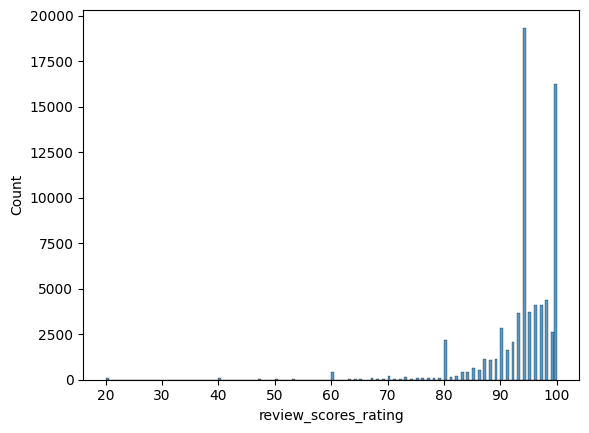

In [20]:
sns.histplot(df['review_scores_rating'],binwidth=0.5)

In [21]:
df.drop(columns=["thumbnail_url"],inplace = True) #dropping the column as it is not really useful to us

In [22]:
df["beds"] = df["beds"].fillna((df["bathrooms"].median())) 
#Filling missing bed counts with the median number of bathrooms to ensure a balanced representation of accommodations.

In [23]:
df.host_since.fillna(method="ffill",inplace=True)

Converting amenities column into numeric to make it more conducive to data analysis

In [24]:
amenities_count = []
for i in df["amenities"]:
    amenities_count.append(len(i))
    
df["amenities"] = amenities_count

## Data Visualisations

<Axes: xlabel='bathrooms', ylabel='Count'>

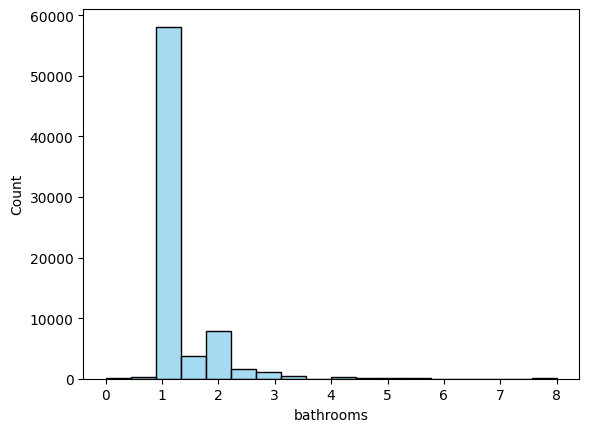

In [25]:
sns.histplot(df['bathrooms'], color='skyblue', edgecolor='black')

<Axes: xlabel='bedrooms', ylabel='Count'>

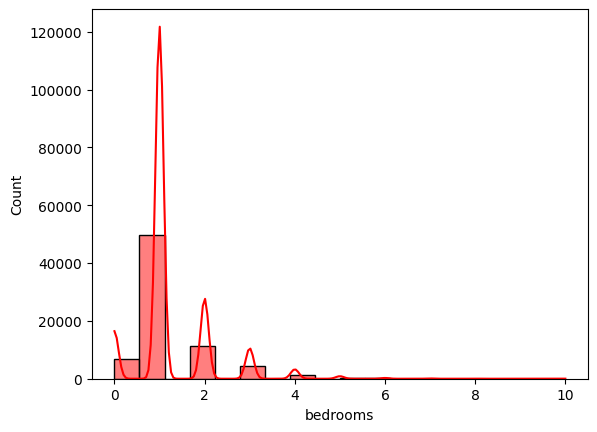

In [26]:
sns.histplot(df['bedrooms'],color='red',kde=True)

<Axes: xlabel='beds', ylabel='Count'>

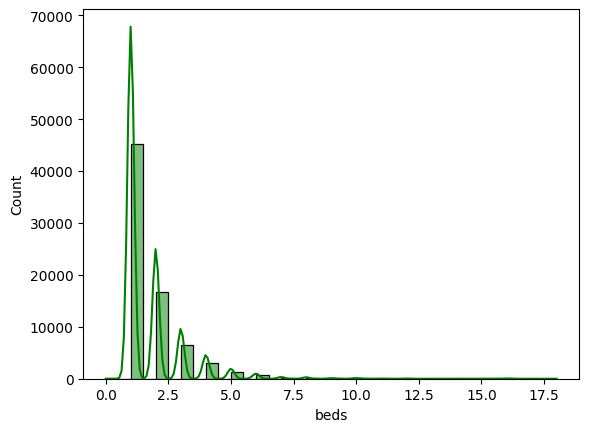

In [27]:
sns.histplot(df['beds'],binwidth=0.5,color='green',kde=True)

<Axes: ylabel='log_price'>

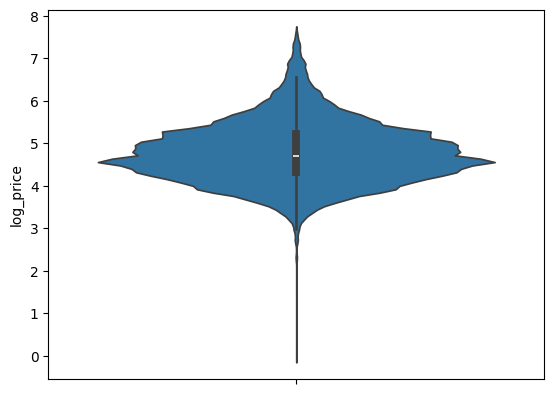

In [28]:
sns.violinplot(df["log_price"])

<Axes: ylabel='number_of_reviews'>

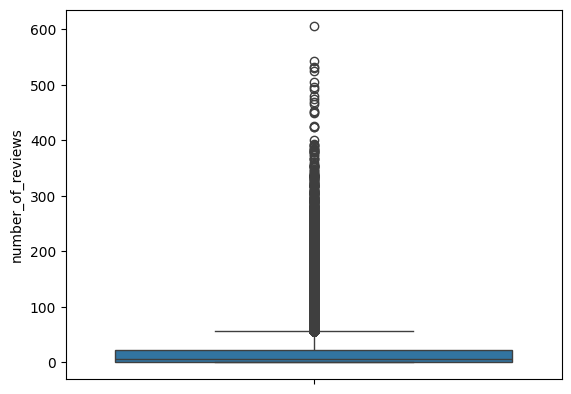

In [29]:
sns.boxplot(df['number_of_reviews'])

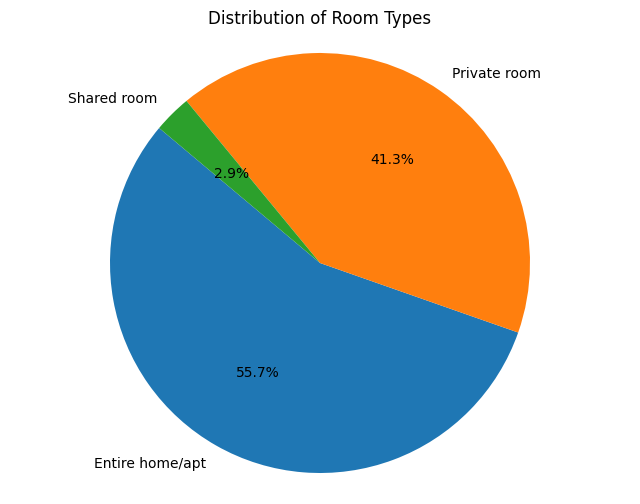

In [30]:
room_type_counts = df['room_type'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Room Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


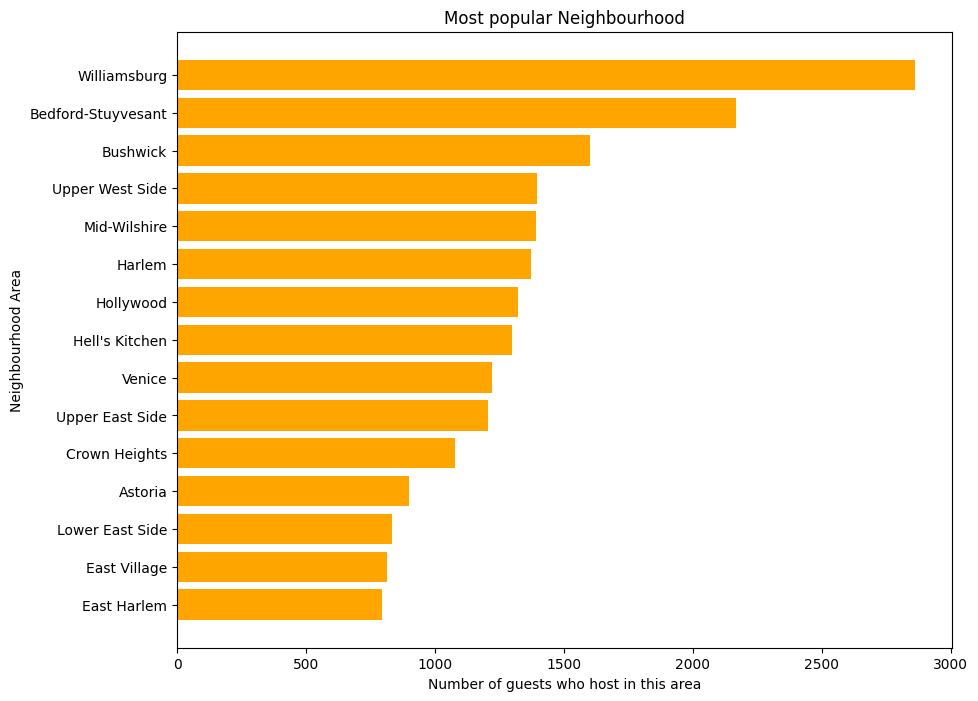

In [31]:
data = df['neighbourhood'].value_counts().head(15)
plt.figure(figsize=(10, 8))
plt.barh(data.index, data.values, color='orange')
plt.title("Most popular Neighbourhood")
plt.xlabel("Number of guests who host in this area")
plt.ylabel("Neighbourhood Area")
plt.gca().invert_yaxis()  # Invert y-axis to display the most popular neighbourhood at the top
plt.show()

In [32]:
def plot_violin(h,v,col):
    plt.figure(figsize=(10, 8))
    sns.violinplot(x='city', y='log_price', data=df,palette=col)
    plt.title('Violin Plot of Log Price by City')
    plt.xlabel('City')
    plt.ylabel('Log Price')
    plt.xticks(rotation=45)  
    plt.show()


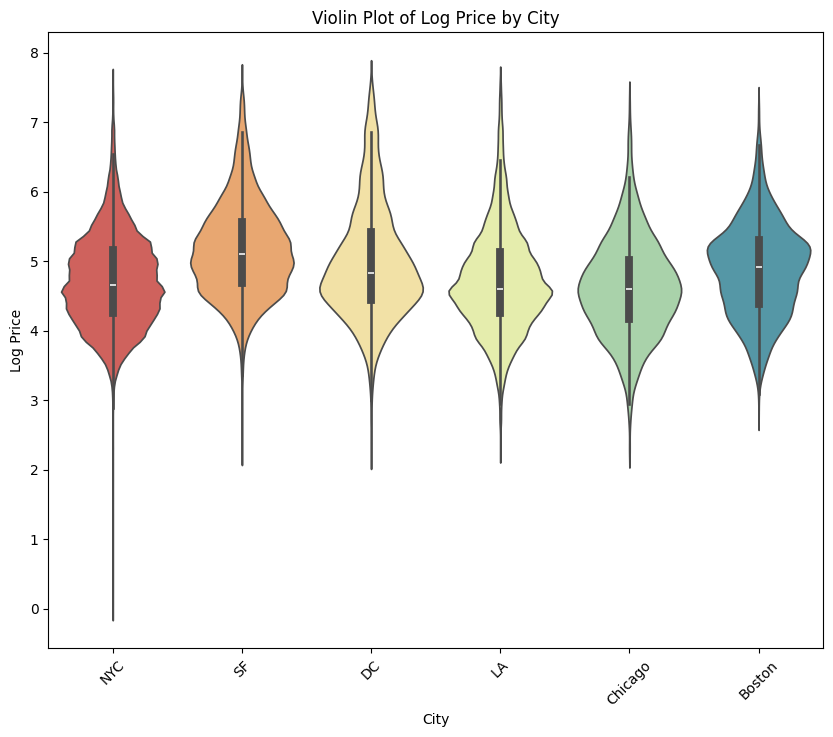

In [33]:
plot_violin('city','log_price','Spectral')

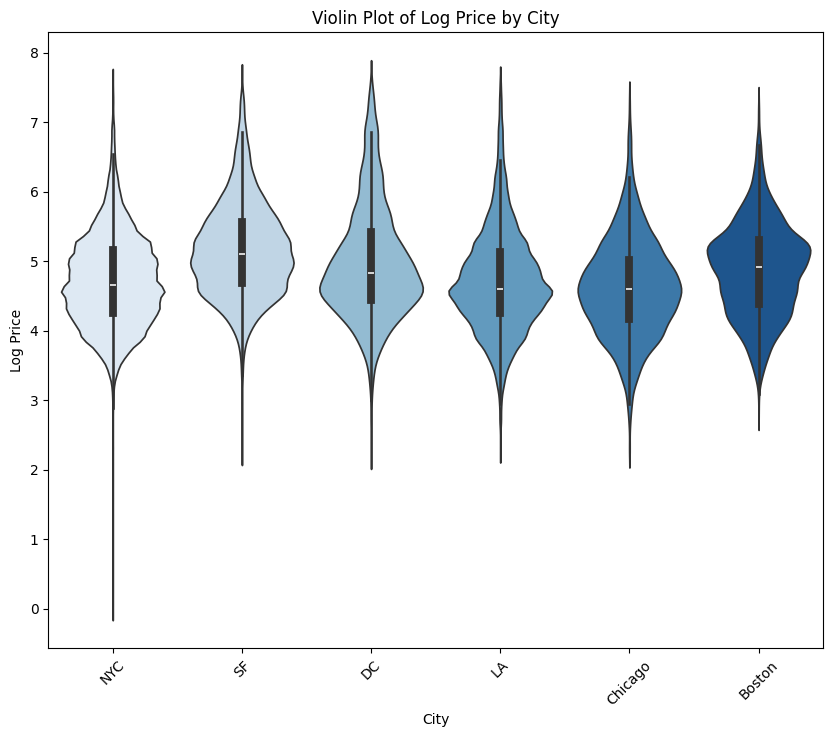

In [34]:
plot_violin("room_type","log_price","Blues")

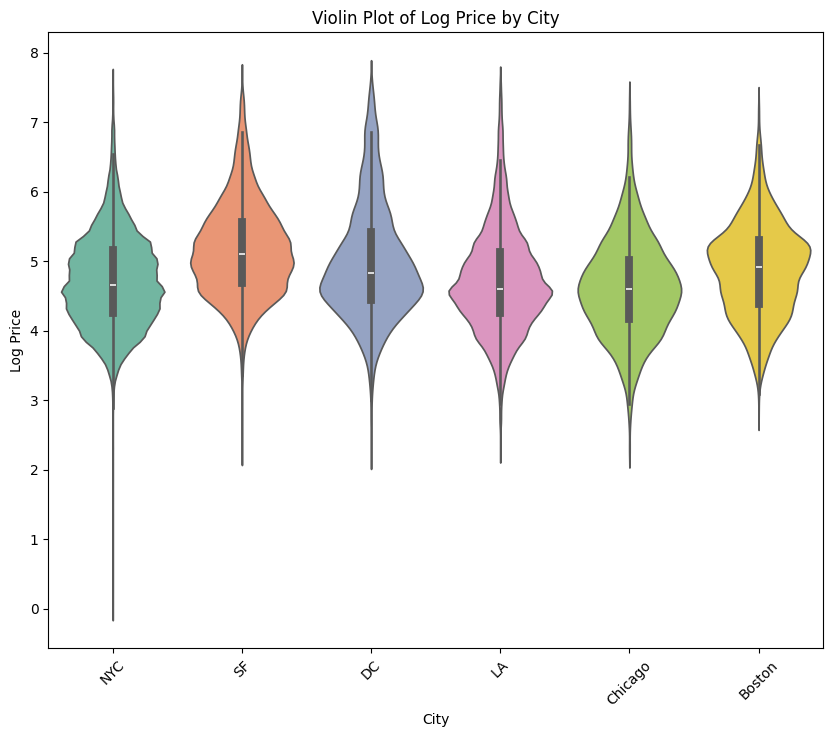

In [35]:
plot_violin("cancellation_policy","log_price","Set2")

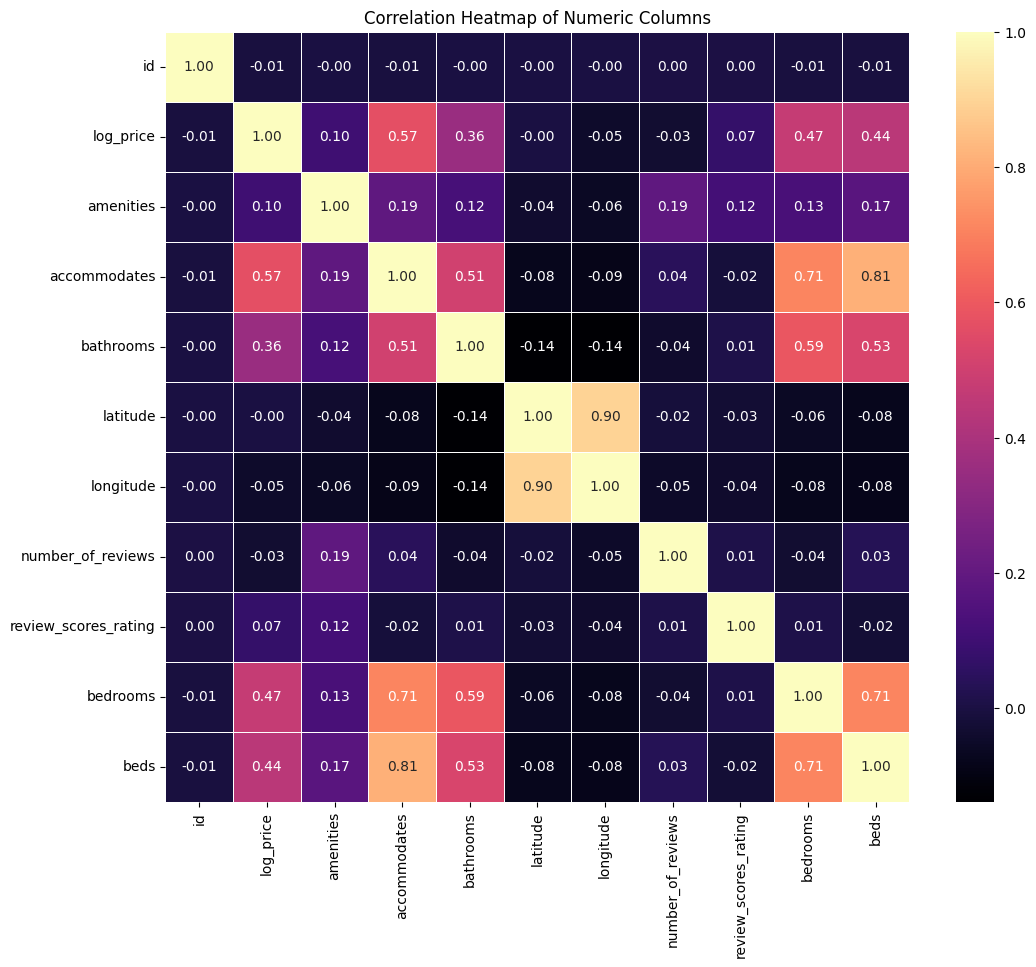

In [36]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [37]:
# group_by property_type describe sort by count
df.groupby('property_type')['log_price'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Apartment,49003.0,4.758850,0.640825,1.609438,4.317488,4.736198,5.164786,7.600402
House,16511.0,4.797114,0.875865,2.302585,4.174387,4.605170,5.347108,7.600402
Condominium,2658.0,5.026539,0.747351,0.000000,4.499810,5.010635,5.521461,7.466799
Townhouse,1692.0,4.833539,0.798849,2.302585,4.248495,4.691348,5.298317,7.600402
Loft,1244.0,5.007919,0.746276,3.178054,4.499810,4.976734,5.453175,7.313220
Other,607.0,4.946367,0.840702,2.890372,4.369448,4.828314,5.393628,7.549609
Guesthouse,498.0,4.685184,0.490892,3.218876,4.382027,4.653960,4.941642,7.313220
Bed & Breakfast,462.0,4.556068,0.600780,2.995732,4.174387,4.553877,4.867534,6.907755
Bungalow,366.0,4.783268,0.469949,3.367296,4.499810,4.766429,5.010635,6.767343


We remove property types with less than 100 entries 

In [38]:
for property_type, count in df.groupby('property_type').log_price.count().items():
    if count <=100:
        df = df[df.property_type != property_type]

In [39]:
df.shape

(73485, 28)

In [40]:
df.groupby('room_type').describe()

id                                                  \
                   count          mean           std     min         25%   
room_type                                                                  
Entire home/apt  40913.0  1.124115e+07  6.094262e+06   344.0  6202232.00   
Private room     30464.0  1.127871e+07  6.065594e+06   941.0  6301914.25   
Shared room       2108.0  1.155855e+07  6.076426e+06  7202.0  6559233.75   

                                                    log_price            ...  \
                        50%         75%         max     count      mean  ...   
room_type                                                                ...   
Entire home/apt  12268056.0  16380837.0  21230903.0   40913.0  5.168197  ...   
Private room     12203207.0  16416905.0  21228356.0   30464.0  4.325484  ...   
Shared room      12813378.0  16626903.5  21177194.0    2108.0  3.876844  ...   

                bedrooms           beds                                     \
                     75%   max    count      mean       std  min  25%  50%   
room_type                                                                    
Entire home/apt      2.0  10.0  40913.0  2.109867  1.432154  0.0  1.0  2.0   
Private room         1.0   8.0  30464.0  1.169905  0.513756  1.0  1.0  1.0   
Shared room          1.0   1.0   2108.0  1.646584  1.817453  1.0  1.0  1.0   

                            
                 75%   max  
room_type                   
Entire home/apt  3.0  18.0  
Private room     1.0  13.0  
Shared room      1.0  16.0  

[3 rows x 88 columns]

In [41]:
df['amenities']

0        152
1        218
2        311
3        210
4        174
        ... 
74105    181
74106      2
74107    224
74108    402
74109    189
Name: amenities, Length: 73485, dtype: int64

### Separating the data into categorical and numeric

In [42]:
categ_col = []
num_col = []
for column in df.columns:
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categ_col.append(column)
    else:
        num_col.append(column)

In [43]:
num_col

['id',
 'log_price',
 'amenities',
 'accommodates',
 'bathrooms',
 'latitude',
 'longitude',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']

In [44]:
categ_col

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'zipcode']

In [45]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
label_encoders={}
for col in categ_col:
    le=LabelEncoder()
    
    df[col] = le.fit_transform(df[col])
    label_encoders[col]=le

In [48]:
pd.set_option("display.max_columns",None)
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,6901257,5.010635,0,0,152,3,1.0,4,2,1,4,9863,2076,1,1,80,1068,0,926,40.696524,-73.991617,10371,77,2,100.000000,195,1.0,1.0
1,6304928,5.129899,0,0,218,7,1.0,4,2,1,4,18841,2489,1,0,2,2979,1,1358,40.766115,-73.989040,65185,252,6,93.000000,74,3.0,3.0
2,7919400,4.976734,0,0,311,5,1.0,4,1,1,4,55188,2392,1,1,2,2742,1,1349,40.808110,-73.943756,65877,247,10,92.000000,84,1.0,3.0
3,13418779,6.620073,7,0,210,4,1.0,4,0,1,5,62583,2392,1,1,80,2187,0,1349,37.772004,-122.431619,9298,325,0,94.067365,745,2.0,2.0
4,3808709,4.744932,0,0,174,2,1.0,4,1,1,2,15769,1673,1,1,2,2138,1,1114,38.925627,-77.034596,31831,119,4,40.000000,340,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74105,808802,4.248495,7,1,181,2,1.0,4,1,1,3,45435,1991,1,1,55,2155,0,1142,34.092640,-118.343921,49923,619,36,91.000000,465,1.0,1.0
74106,14549287,4.605170,0,1,2,1,1.0,4,0,0,4,71928,1991,1,1,80,1431,0,1142,40.709025,-73.939405,71738,605,0,94.067365,203,1.0,1.0
74107,13281809,5.043425,0,0,224,4,2.0,4,1,1,3,30477,2134,1,0,2,2567,0,1197,33.871549,-118.396053,59442,255,16,93.000000,513,2.0,4.0
74108,18688039,5.220356,0,0,402,5,1.0,4,1,1,4,4643,1544,1,1,2,987,1,1345,40.706749,-73.942377,43354,605,43,94.000000,203,2.0,2.0


In [49]:
x = df.drop(["id","name","log_price","description","first_review","host_since","last_review","neighbourhood",
             "zipcode"],axis = 1)
y = df.log_price

In [50]:
x

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,0,0,152,3,1.0,4,2,1,4,1,1,80,0,40.696524,-73.991617,2,100.000000,1.0,1.0
1,0,0,218,7,1.0,4,2,1,4,1,0,2,1,40.766115,-73.989040,6,93.000000,3.0,3.0
2,0,0,311,5,1.0,4,1,1,4,1,1,2,1,40.808110,-73.943756,10,92.000000,1.0,3.0
3,7,0,210,4,1.0,4,0,1,5,1,1,80,0,37.772004,-122.431619,0,94.067365,2.0,2.0
4,0,0,174,2,1.0,4,1,1,2,1,1,2,1,38.925627,-77.034596,4,40.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74105,7,1,181,2,1.0,4,1,1,3,1,1,55,0,34.092640,-118.343921,36,91.000000,1.0,1.0
74106,0,1,2,1,1.0,4,0,0,4,1,1,80,0,40.709025,-73.939405,0,94.067365,1.0,1.0
74107,0,0,224,4,2.0,4,1,1,3,1,0,2,0,33.871549,-118.396053,16,93.000000,2.0,4.0
74108,0,0,402,5,1.0,4,1,1,4,1,1,2,1,40.706749,-73.942377,43,94.000000,2.0,2.0


In [51]:
# Calculate median values for 'bathrooms' and 'bedrooms'
bathrooms_median = x['bathrooms'].median()
bedrooms_median = x['bedrooms'].median()

# Fill NaN values in 'bathrooms' and 'bedrooms' columns with their respective medians
x['bathrooms'].fillna(bathrooms_median, inplace=True)
x['bedrooms'].fillna(bedrooms_median, inplace=True)


In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [53]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

In [54]:
lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

In [55]:
from sklearn import metrics


mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('\nMean Squarred Error of Linear Regression     : ', mse_lr)
print('\nRoot Mean Squarred Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  0.36735610246700384

Mean Squarred Error of Linear Regression     :  0.23724896384453006

Root Mean Squarred Error of Linear Regression:  0.48708209148410503

R2 Score of Linear Regression                :  0.53672371670593


In [56]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor()

In [57]:
rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

In [58]:
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)


print('\nMean Absolute Error of Random Forest Regressor     : ', mae_rf)
print('\nMean Squarred Error of Random Forest Regressor     : ', mse_rf)
print('\nRoot Mean Squarred Error of Random Forest Regressor: ', rmse_rf)
print('\nR2 Score of Random Forest Regressor                : ', r2_rf)


Mean Absolute Error of Random Forest Regressor     :  0.2819150629982467

Mean Squarred Error of Random Forest Regressor     :  0.152880975779098

Root Mean Squarred Error of Random Forest Regressor:  0.3909999690269783

R2 Score of Random Forest Regressor                :  0.7014691693586328


In [59]:
from sklearn.ensemble import GradientBoostingRegressor


gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

In [60]:
gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

In [61]:
mae_gb  = metrics.mean_absolute_error(y_test, y_pred_gb)
mse_gb  = metrics.mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
r2_gb   = metrics.r2_score(y_test, y_pred_gb)


print('\nMean Absolute Error of Gradient Boosting     : ', mae_gb)
print('\nMean Squarred Error of Gradient Boosting     : ', mse_gb)
print('\nRoot Mean Squarred Error of Gradient Boosting: ', rmse_gb)
print('\nR2 Score of Gradient Boosting                : ', r2_gb)


Mean Absolute Error of Gradient Boosting     :  0.30287346954439354

Mean Squarred Error of Gradient Boosting     :  0.1686371349755431

Root Mean Squarred Error of Gradient Boosting:  0.410654520218082

R2 Score of Gradient Boosting                :  0.6707021019150754


In [62]:
%pip install xgboost
from xgboost import XGBRegressor


xgb = XGBRegressor(objective='reg:squarederror')

Note: you may need to restart the kernel to use updated packages.


In [63]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
y_pred_xgb = xgb.predict(x_test)

In [65]:
mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  0.280602677966964

Mean Squarred Error of XGBoost Regressor     :  0.14877679342110542

Root Mean Squarred Error of XGBoost Regressor:  0.38571594914017415

R2 Score of XGBoost Regressor                :  0.7094834102554566


In [66]:
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_rf ,
          "Gradient Boosting": r2_gb ,
          "XGBoost": r2_xgb}

mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_rf ,
          "Gradient Boosting": mae_gb ,
          "XGBoost": mae_xgb}

mse_list = {"Linear Regression": mse_lr,
          "Random Forest": mse_rf ,
          "Gradient Boosting": mse_gb ,
          "XGBoost": mse_xgb}

rmse_list = {"Linear Regression": rmse_lr,
          "Random Forest": rmse_rf ,
          "Gradient Boosting": rmse_gb ,
          "XGBoost": rmse_xgb}


In [67]:
a1 = pd.DataFrame.from_dict({"Linear Regression": r2_lr,
                              "Random Forest": r2_rf,
                              "Gradient Boosting": r2_gb,
                              "XGBoost": r2_xgb}, orient='index', columns=["R2 SCORE"])

a2 = pd.DataFrame.from_dict({"Linear Regression": mae_lr,
                              "Random Forest": mae_rf,
                              "Gradient Boosting": mae_gb,
                              "XGBoost": mae_xgb}, orient='index', columns=["MEAN ABSOLUTE ERROR"])

a3 = pd.DataFrame.from_dict({"Linear Regression": mse_lr,
                              "Random Forest": mse_rf,
                              "Gradient Boosting": mse_gb,
                              "XGBoost": mse_xgb}, orient='index', columns=["MEAN SQUARED ERROR"])

a4 = pd.DataFrame.from_dict({"Linear Regression": rmse_lr,
                              "Random Forest": rmse_rf,
                              "Gradient Boosting": rmse_gb,
                              "XGBoost": rmse_xgb}, orient='index', columns=["ROOT MEAN SQUARED ERROR"])


In [68]:
org = pd.concat([a1, a2, a3, a4], axis = 1)
org

,R2 SCORE,MEAN ABSOLUTE ERROR,MEAN SQUARED ERROR,ROOT MEAN SQUARED ERROR
Linear Regression,0.536724,0.367356,0.237249,0.487082
Random Forest,0.701469,0.281915,0.152881,0.391000
Gradient Boosting,0.670702,0.302873,0.168637,0.410655
XGBoost,0.709483,0.280603,0.148777,0.385716


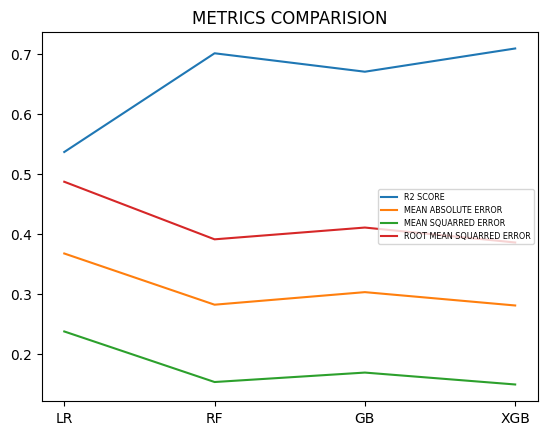

In [69]:
alg = ['LR','RF','GB','XGB']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
legend = ["R2 SCORE", "MEAN ABSOLUTE ERROR", "MEAN SQUARRED ERROR", "ROOT MEAN SQUARRED ERROR"]

plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize='xx-small')
plt.show()

In [70]:
tt= pd.DataFrame(pd.read_csv("/Users/vanshikwaghela/DJ/Sem 4/ML/MiniProj/Airbnb-Price-Prediction/Airbnb_Data.csv").iloc[2]).T

In [71]:
# tt=tt.drop(["thumbnail_url","id","name","log_price","description","first_review","host_since","last_review","neighbourhood",
             # "zipcode"],axis = 1)

In [72]:
from joblib import load,dump

In [73]:
tt

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.80811,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0


In [74]:
def transfm(tt):
    tt=tt.drop(["thumbnail_url","id","name","log_price","description","first_review","host_since","last_review","neighbourhood",
             "zipcode"],axis = 1)
    for col in ['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'instant_bookable']:
        tt[col] = label_encoders[col].transform(tt[col])
    # print(col)
    tt['amenities']=len(str(tt['amenities']).replace('{',"").replace('}',"").replace('"',"").split(','))
    return lr.predict(tt)[0]

In [75]:
tt.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [76]:
transfm(tt)

5.01094949733209

In [77]:
label_encoders['property_type'].inverse_transform([0])

array(['Apartment'], dtype=object)

In [78]:
for col in ['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'instant_bookable']:
    tt[col] = label_encoders[col].transform(tt[col])
    print(col)

property_type
room_type
bed_type
cancellation_policy
cleaning_fee
city
host_has_profile_pic
host_identity_verified
host_response_rate
instant_bookable


In [79]:
tt['amenities'][-10:]

2    {TV,"Cable TV","Wireless Internet","Air condit...
Name: amenities, dtype: object

In [80]:
tt['amenities']=len(str(tt['amenities']).replace('{',"").replace('}',"").replace('"',"").split(','))

In [81]:
# amenities_count = []
# for i in df["amenities"]:
#     amenities_count.append(len(i))
    
# df["amenities"] = amenities_count

In [82]:
def input_param():
    df2=pd.DataFrame(tt.iloc[513]).T
    print(df2)

In [83]:
tt

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
2,7919400,4.976734,0,0,5,5,1.0,4,1,1,4,The Oasis comes complete with a full backyard ...,2017-04-30,1,1,2,2016-10-25,1,2017-09-14,40.80811,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0


In [85]:
# lr.predict(tt)

In [91]:
from flask import Flask, request, jsonify
from flask_cors import CORS

# import pickle

# Load the trained model

app = Flask(__name__)
CORS(app)
@app.route('/')
def home():
    return 'Welcome to the Airbnb Price Prediction API'

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    prediction = transfm(pd.DataFrame(pd.Series(data).T))#model.predict([list(data.values())])
    return jsonify({'prediction': prediction})

if __name__ == '__main__':
    app.run(debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [06/May/2024 11:43:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2024 11:44:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/May/2024 11:45:59] "GET / HTTP/1.1" 200 -


In [ ]:
!pip install flask-cors